# Plots of different components

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from xgcm import Grid

In [4]:
import sys
sys.path.append('../src/training-on-CM2.6/')
from helpers.selectors import *

In [5]:
import warnings
import logging

# Ignore all warnings
warnings.filterwarnings("ignore")

# Suppress numpy floating warnings (np is already imported in the notebook)
try:
    np.seterr(all="ignore")
except NameError:
    pass

# Reduce logging noise
logging.getLogger().setLevel(logging.ERROR)

In [6]:
data_dir = '/vast/db194/CM26_datasets/ocean3d/subfilter/FGR3/factor-'
factors = [4, 9 , 12, 15]

In [7]:
exp_dir = data_dir + str(factors[2])
ds = xr.open_dataset(exp_dir + '/validate-0.nc')
ds_perm = xr.open_dataset(exp_dir + '/permanent_features.nc')
ds_param = xr.open_dataset(exp_dir + '/param.nc')


In [8]:
ds

<xarray.Dataset> Size: 514MB
Dimensions:              (zl: 50, yh: 225, xq: 300, yq: 225, xh: 300)
Coordinates:
  * yh                   (yh) float64 2kB -80.88 -80.37 -79.86 ... 89.24 89.75
  * xq                   (xq) float64 2kB -278.8 -277.6 -276.4 ... 78.8 80.0
  * zl                   (zl) float64 400B 5.034 15.1 ... 5.185e+03 5.395e+03
    time                 object 8B ...
  * xh                   (xh) float64 2kB -279.4 -278.2 -277.0 ... 78.2 79.4
  * yq                   (yq) float64 2kB -80.62 -80.12 -79.61 ... 89.49 90.0
Data variables: (12/42)
    u                    (zl, yh, xq) float32 14MB ...
    v                    (zl, yq, xh) float32 14MB ...
    rho                  (zl, yh, xh) float32 14MB ...
    SGSx                 (zl, yh, xq) float32 14MB ...
    SGSy                 (zl, yq, xh) float32 14MB ...
    Txx                  (zl, yh, xh) float32 14MB ...
    ...                   ...
    dvdz_geo             (zl, yh, xh) float32 14MB ...
    rhox                 (zl, yh, xh) float32 14MB ...
    rhoy                 (zl, yh, xh) float32 14MB ...
    dudz_mag             (zl, yh, xh) float32 14MB ...
    dudz_geo_mag         (zl, yh, xh) float32 14MB ...
    rho_grad_mag         (zl, yh, xh) float32 14MB ...

In [6]:
ds_param

<xarray.Dataset> Size: 76MB
Dimensions:   (xh: 300, xq: 300, yh: 225, yq: 225, zl: 50, zi: 51)
Coordinates:
  * xh        (xh) float64 2kB -279.4 -278.2 -277.0 -275.8 ... 77.0 78.2 79.4
  * xq        (xq) float64 2kB -278.8 -277.6 -276.4 -275.2 ... 77.6 78.8 80.0
  * yh        (yh) float64 2kB -80.88 -80.37 -79.86 -79.36 ... 88.73 89.24 89.75
  * yq        (yq) float64 2kB -80.62 -80.12 -79.61 -79.1 ... 88.99 89.49 90.0
  * zl        (zl) float64 400B 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * zi        (zi) float64 408B 0.0 10.07 20.16 ... 5.08e+03 5.29e+03 5.5e+03
Data variables: (12/21)
    dxT       (yh, xh) float64 540kB ...
    dyT       (yh, xh) float64 540kB ...
    dyCu      (yh, xq) float64 540kB ...
    dxCv      (yq, xh) float64 540kB ...
    dyBu      (yq, xq) float64 540kB ...
    dxBu      (yq, xq) float64 540kB ...
    ...        ...
    geolon_u  (yh, xq) float64 540kB ...
    geolat_u  (yh, xq) float64 540kB ...
    geolon_v  (yq, xh) float64 540kB ...
    geolat_v  (yq, xh) float64 540kB ...
    geolon_w  (yq, xq) float64 540kB ...
    geolat_w  (yq, xq) float64 540kB ...

In [7]:
ds_perm

<xarray.Dataset> Size: 43MB
Dimensions:               (zl: 50, yh: 225, xh: 300)
Coordinates:
  * xh                    (xh) float64 2kB -279.4 -278.2 -277.0 ... 78.2 79.4
  * yh                    (yh) float64 2kB -80.88 -80.37 -79.86 ... 89.24 89.75
  * zl                    (zl) float64 400B 5.034 15.1 ... 5.185e+03 5.395e+03
Data variables:
    wet                   (zl, yh, xh) float32 14MB ...
    wet_nan               (zl, yh, xh) float32 14MB ...
    delta_x               (yh, xh) float32 270kB ...
    depth                 (yh, xh) float32 270kB ...
    zl_over_depth         (zl, yh, xh) float32 14MB ...
    coriolis              (yh, xh) float32 270kB ...
    beta                  (yh, xh) float32 270kB ...
    dHdx                  (yh, xh) float32 270kB ...
    dHdy                  (yh, xh) float32 270kB ...
    H_grad_mag            (yh, xh) float32 270kB ...
    beta_topo_full        (yh, xh) float32 270kB ...
    beta_topo_meridional  (yh, xh) float32 270kB ...

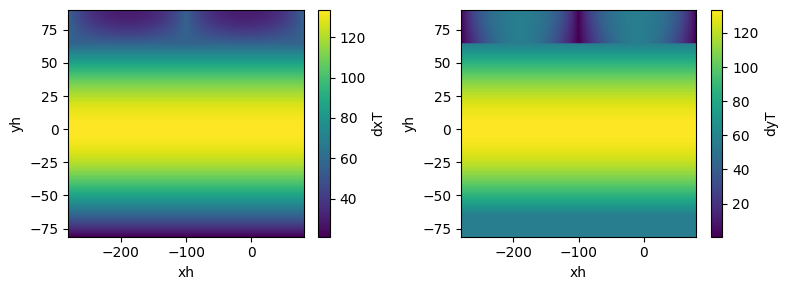

In [8]:
plt.figure(figsize=(8,3))

plt.subplot(1,2, 1)
(ds_param.dxT/1e3).plot()

plt.subplot(1,2, 2)
(ds_param.dyT/1e3).plot()   

plt.tight_layout()

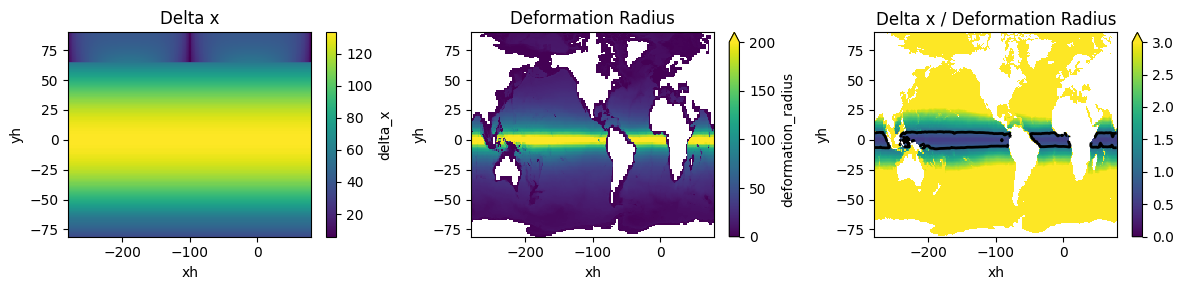

In [9]:
plt.figure(figsize=(12, 3))

plt.subplot(1,3,1)
(ds_perm.delta_x/1e3).plot()
plt.title('Delta x')

plt.subplot(1,3,2)
(ds.deformation_radius/1e3).plot(vmax=200)
plt.title('Deformation Radius')

plt.subplot(1,3,3)
(ds_perm.delta_x/ ds.deformation_radius).plot(vmin=0, vmax=3)
(ds_perm.delta_x/ ds.deformation_radius).plot.contour(levels=[1], colors='k', linewidths=2)
plt.title('Delta x / Deformation Radius')

plt.tight_layout()

In [10]:
grid = Grid(ds_param, coords={'X': {'center': 'xh', 'outer': 'xq'},
                              'Y': {'center': 'yh', 'outer': 'yq'},
                              'Z': {'center': 'zl', 'outer': 'zi'}},    periodic=['X'])

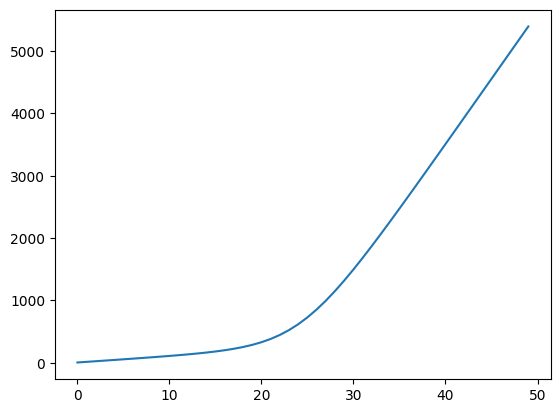

In [21]:
plt.plot(ds.zl)

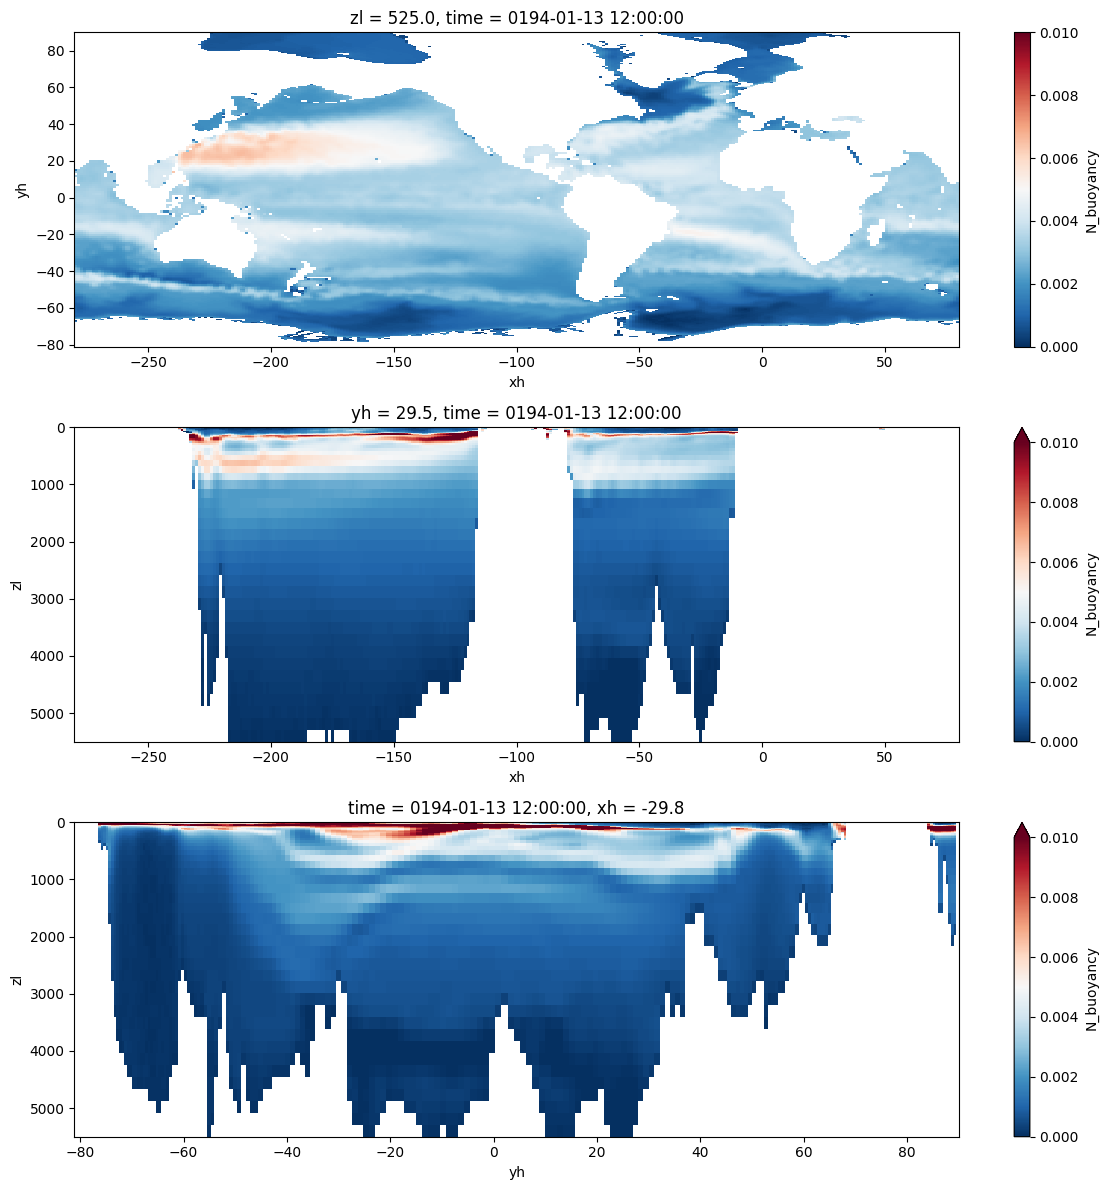

In [11]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
ds.N_buoyancy.where(ds_param.wet).sel(zl=500, method='nearest').plot(cmap='RdBu_r', vmax=0.01)
#plt.gca().invert_yaxis()

plt.subplot(3,1,2)
ds.N_buoyancy.where(ds_param.wet).sel(yh=30, method='nearest').plot(cmap='RdBu_r', vmax=0.01)
plt.gca().invert_yaxis()

plt.subplot(3,1,3)
ds.N_buoyancy.where(ds_param.wet).sel(xh=-30, method='nearest').plot(cmap='RdBu_r', vmax=0.01)
plt.gca().invert_yaxis()

plt.tight_layout()

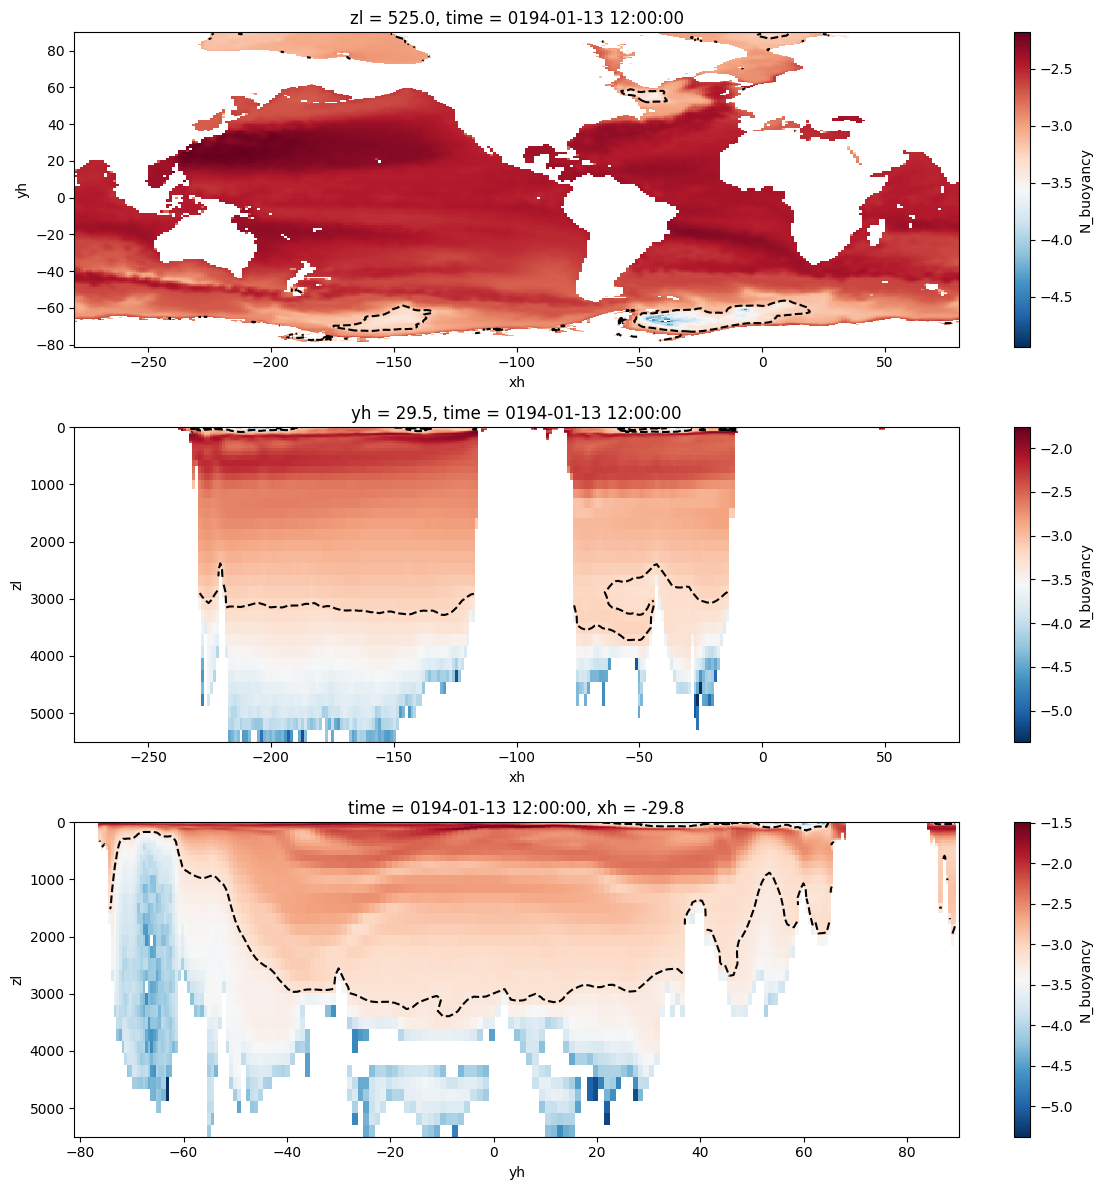

In [38]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
np.log10(ds.N_buoyancy).where(ds_param.wet).sel(zl=500, method='nearest').plot(cmap='RdBu_r')
np.log10(ds.N_buoyancy).where(ds_param.wet).sel(zl=500, method='nearest').plot.contour(levels=[-3.2], colors='k')
#plt.gca().invert_yaxis()

plt.subplot(3,1,2)
np.log10(ds.N_buoyancy).where(ds_param.wet).sel(yh=30, method='nearest').plot(cmap='RdBu_r')
np.log10(ds.N_buoyancy).where(ds_param.wet).sel(yh=30, method='nearest').plot.contour(levels=[-3.2], colors='k')
plt.gca().invert_yaxis()

plt.subplot(3,1,3)
np.log10(ds.N_buoyancy).where(ds_param.wet).sel(xh=-30, method='nearest').plot(cmap='RdBu_r')
np.log10(ds.N_buoyancy).where(ds_param.wet).sel(xh=-30, method='nearest').plot.contour(levels=[-3.2], colors='k')
plt.gca().invert_yaxis()

plt.tight_layout()

/home/db194/.local/lib/python3.11/site-packages/xarray/core/computation.py:821: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


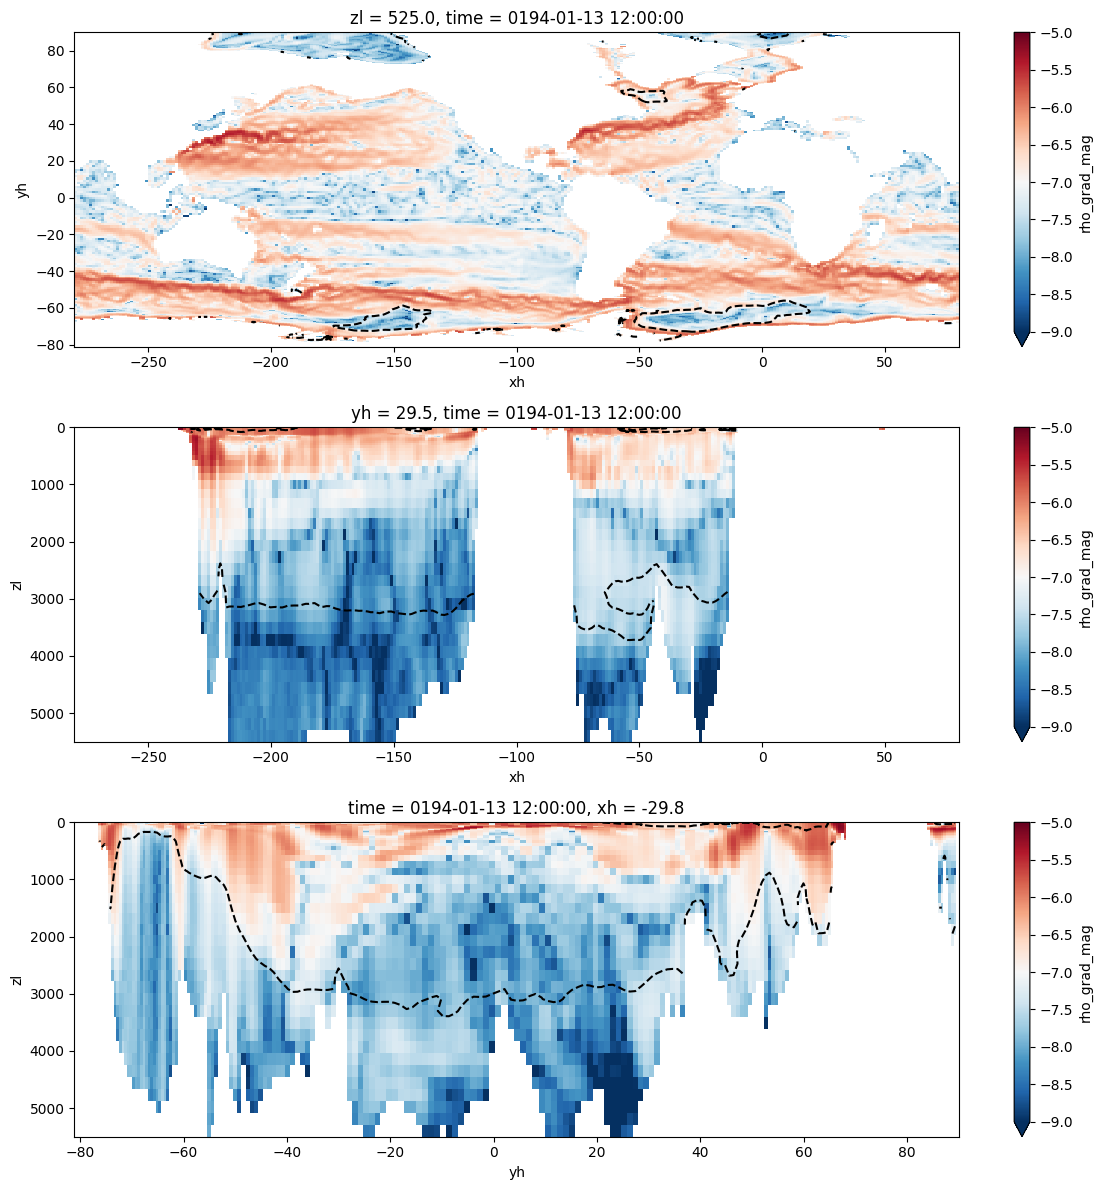

In [43]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
np.log10(ds.rho_grad_mag).where(ds_param.wet).sel(zl=500, method='nearest').plot(cmap='RdBu_r', vmin=-9, vmax=-5)
np.log10(ds.N_buoyancy).where(ds_param.wet).sel(zl=500, method='nearest').plot.contour(levels=[-3.2], colors='k')
#plt.gca().invert_yaxis()

plt.subplot(3,1,2)
np.log10(ds.rho_grad_mag).where(ds_param.wet).sel(yh=30, method='nearest').plot(cmap='RdBu_r', vmin=-9, vmax=-5)
np.log10(ds.N_buoyancy).where(ds_param.wet).sel(yh=30, method='nearest').plot.contour(levels=[-3.2], colors='k')
plt.gca().invert_yaxis()

plt.subplot(3,1,3)
np.log10(ds.rho_grad_mag).where(ds_param.wet).sel(xh=-30, method='nearest').plot(cmap='RdBu_r', vmin=-9, vmax=-5)
np.log10(ds.N_buoyancy).where(ds_param.wet).sel(xh=-30, method='nearest').plot.contour(levels=[-3.2], colors='k')
plt.gca().invert_yaxis()

plt.tight_layout()

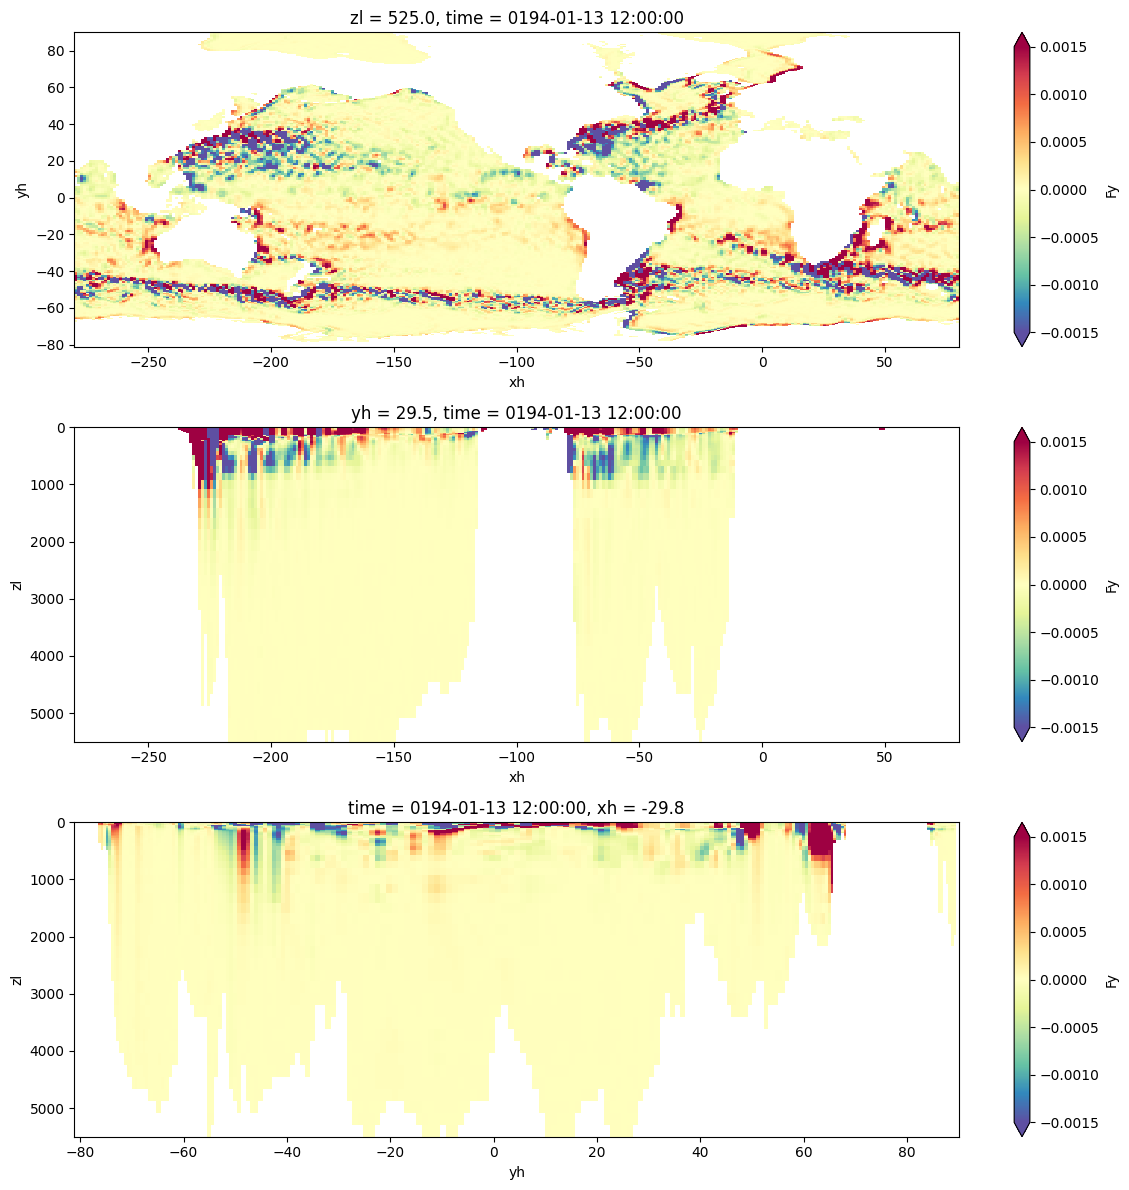

In [111]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
ds.Fy.where(ds_param.wet).sel(zl=500, method='nearest').plot(cmap='Spectral_r', vmin=-0.0015, robust=True)
#plt.gca().invert_yaxis()

plt.subplot(3,1,2)
ds.Fy.where(ds_param.wet).sel(yh=30, method='nearest').plot(cmap='Spectral_r', vmin=-0.0015, robust=True)
plt.gca().invert_yaxis()

plt.subplot(3,1,3)
ds.Fy.where(ds_param.wet).sel(xh=-30, method='nearest').plot(cmap='Spectral_r', vmin=-0.0015, robust=True)
plt.gca().invert_yaxis()

plt.tight_layout()

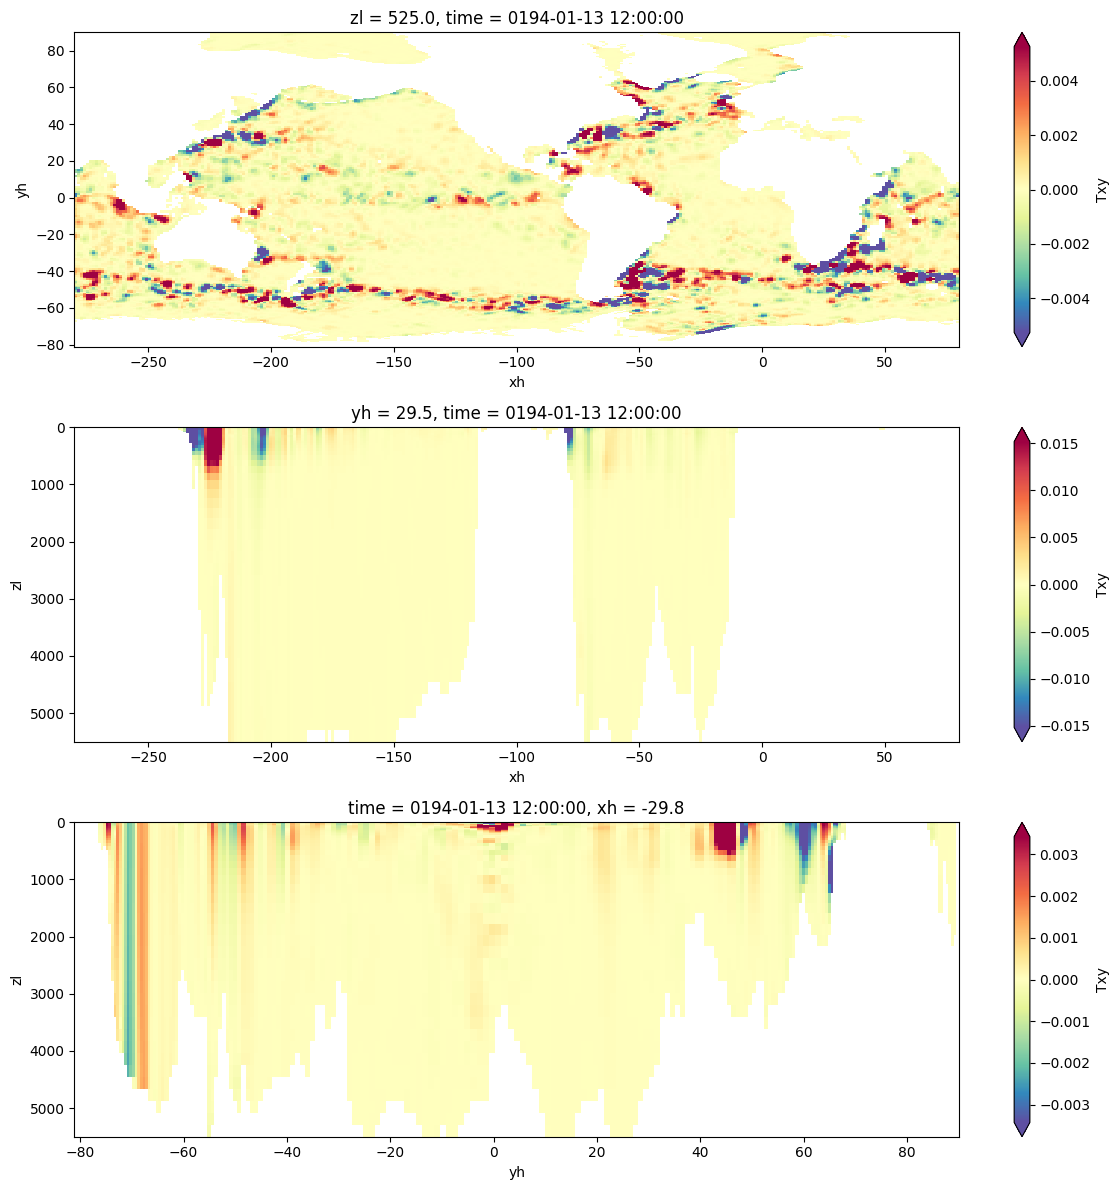

In [16]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
ds.Txy.where(ds_param.wet).sel(zl=500, method='nearest').plot(cmap='Spectral_r', robust=True)
#plt.gca().invert_yaxis()

plt.subplot(3,1,2)
ds.Txy.where(ds_param.wet).sel(yh=30, method='nearest').plot(cmap='Spectral_r',  robust=True)
plt.gca().invert_yaxis()

plt.subplot(3,1,3)
ds.Txy.where(ds_param.wet).sel(xh=-30, method='nearest').plot(cmap='Spectral_r', robust=True)
plt.gca().invert_yaxis()

plt.tight_layout()

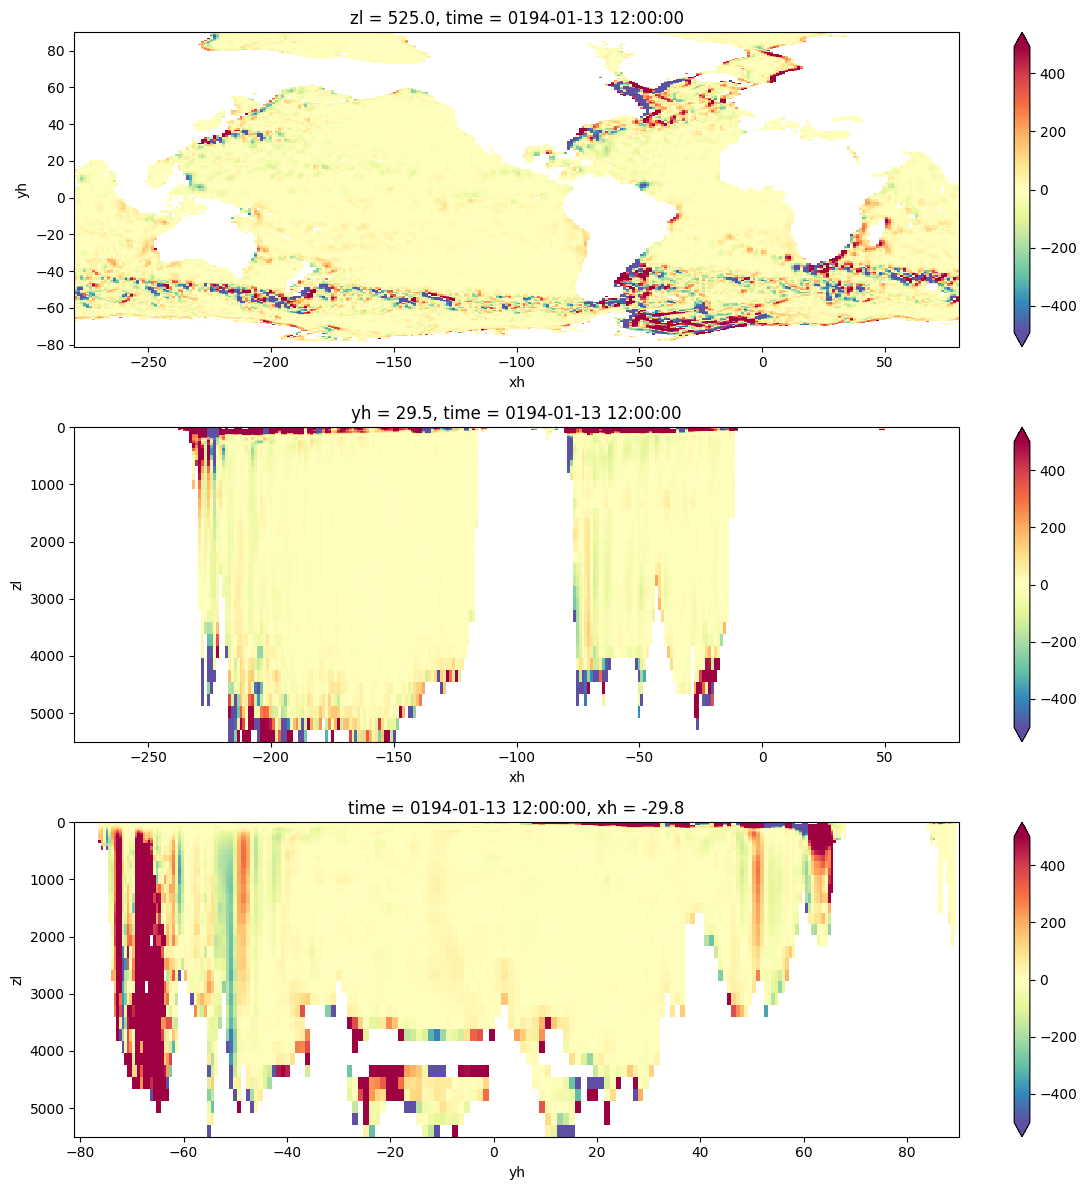

In [57]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
(ds.Fy/ds.N_buoyancy**2).where(ds_param.wet).sel(zl=500, method='nearest').plot(cmap='Spectral_r', robust=True)
#plt.gca().invert_yaxis()

plt.subplot(3,1,2)
(ds.Fy/ds.N_buoyancy**2).where(ds_param.wet).sel(yh=30, method='nearest').plot(cmap='Spectral_r',   robust=True, vmin=-500)
plt.gca().invert_yaxis()

plt.subplot(3,1,3)
(ds.Fy/ds.N_buoyancy**2).where(ds_param.wet).sel(xh=-30, method='nearest').plot(cmap='Spectral_r',  robust=True, vmin=-500)
plt.gca().invert_yaxis()

plt.tight_layout()

In [112]:
F_mag = (ds.Fx**2 + ds.Fy**2)**0.5
gradrho_mag = ds.rho_grad_mag
gradu_mag = ds.shear_vort_mag
N2 = ds.N_buoyancy**2
dX = ds_perm.delta_x

Txy_mag = (ds.Txy**2)**0.5

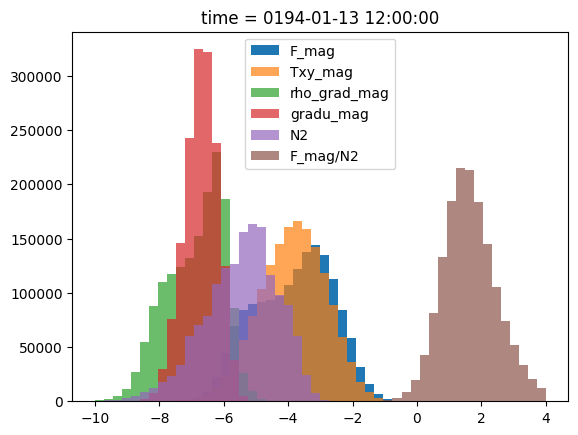

In [114]:
np.log10(F_mag).where(ds_param.wet).plot(bins=np.linspace(-10,4,51))
np.log10(Txy_mag).where(ds_param.wet).plot(bins=np.linspace(-10,4,51), alpha=0.7)
np.log10(gradrho_mag).where(ds_param.wet).plot(bins=np.linspace(-10,4,51), alpha=0.7)
np.log10(gradu_mag).where(ds_param.wet).plot(bins=np.linspace(-10,4,51), alpha=0.7)
np.log10(N2).where(ds_param.wet).plot(bins=np.linspace(-10,4,51), alpha=0.7)
np.log10(F_mag/N2).where(ds_param.wet).plot(bins=np.linspace(-10,4,51), alpha=0.7)
plt.legend(['F_mag', 'Txy_mag', 'rho_grad_mag', 'gradu_mag','N2','F_mag/N2'])

/home/db194/.local/lib/python3.11/site-packages/xarray/core/computation.py:821: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


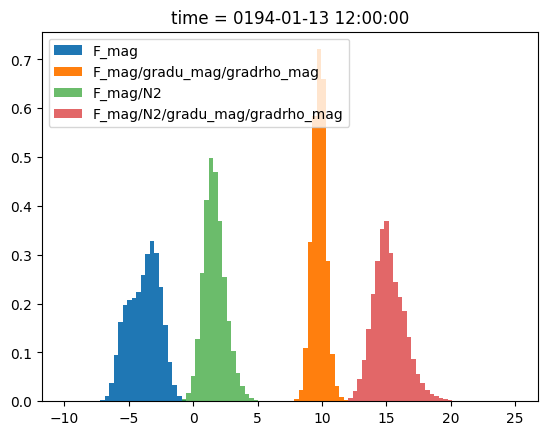

In [78]:
np.log10(F_mag).where(ds_param.wet).plot(bins=np.linspace(-10,25,101), density=True)
np.log10(F_mag/gradu_mag/gradrho_mag).where(ds_param.wet).plot(bins=np.linspace(-10,25,101), density=True)
np.log10(F_mag/N2).where(ds_param.wet).plot(bins=np.linspace(-10,25,101), alpha=0.7, density=True)
np.log10(F_mag/N2/gradu_mag/gradrho_mag).where(ds_param.wet).plot(bins=np.linspace(-10,25,101), alpha=0.7, density=True)
plt.legend(['F_mag', 'F_mag/gradu_mag/gradrho_mag', 'F_mag/N2', 'F_mag/N2/gradu_mag/gradrho_mag'], loc='upper left')


/home/db194/.local/lib/python3.11/site-packages/xarray/core/computation.py:821: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


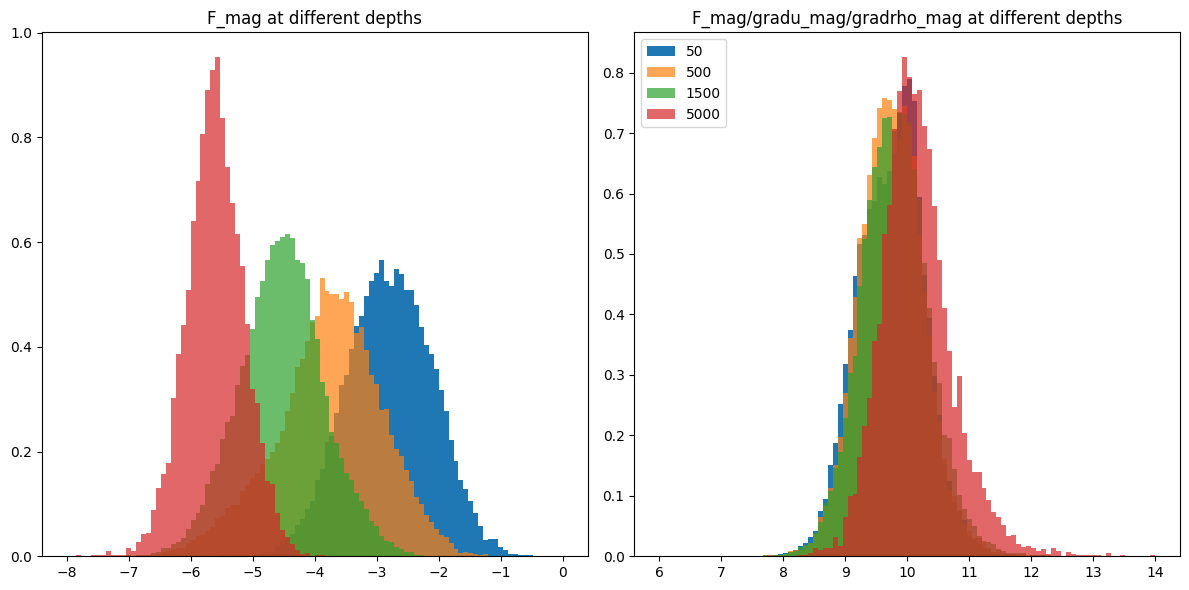

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
np.log10(F_mag).where(ds_param.wet).sel(zl=50, method='nearest').plot.hist(bins=np.linspace(-8,0,101), density=True)
np.log10(F_mag).where(ds_param.wet).sel(zl=500, method='nearest').plot.hist(bins=np.linspace(-8,0,101), density=True, alpha=0.7)
np.log10(F_mag).where(ds_param.wet).sel(zl=1500, method='nearest').plot.hist(bins=np.linspace(-8,0,101), density=True, alpha=0.7)
np.log10(F_mag).where(ds_param.wet).sel(zl=5000, method='nearest').plot.hist(bins=np.linspace(-8,0,101), density=True, alpha=0.7)
plt.title('F_mag at different depths')

plt.subplot(1,2,2)
np.log10(F_mag/gradu_mag/gradrho_mag).where(ds_param.wet).sel(zl=50, method='nearest').plot.hist(bins=np.linspace(6,14,101), density=True)
np.log10(F_mag/gradu_mag/gradrho_mag).where(ds_param.wet).sel(zl=500, method='nearest').plot.hist(bins=np.linspace(6,14,101), density=True, alpha=0.7)
np.log10(F_mag/gradu_mag/gradrho_mag).where(ds_param.wet).sel(zl=1500, method='nearest').plot.hist(bins=np.linspace(6,14,101), density=True, alpha=0.7)
np.log10(F_mag/gradu_mag/gradrho_mag).where(ds_param.wet).sel(zl=5000, method='nearest').plot.hist(bins=np.linspace(6,14,101), density=True, alpha=0.7)
plt.title('F_mag/gradu_mag/gradrho_mag at different depths')
plt.legend(['50','500','1500','5000'], loc='upper left')

plt.tight_layout()


/home/db194/.local/lib/python3.11/site-packages/xarray/core/computation.py:821: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


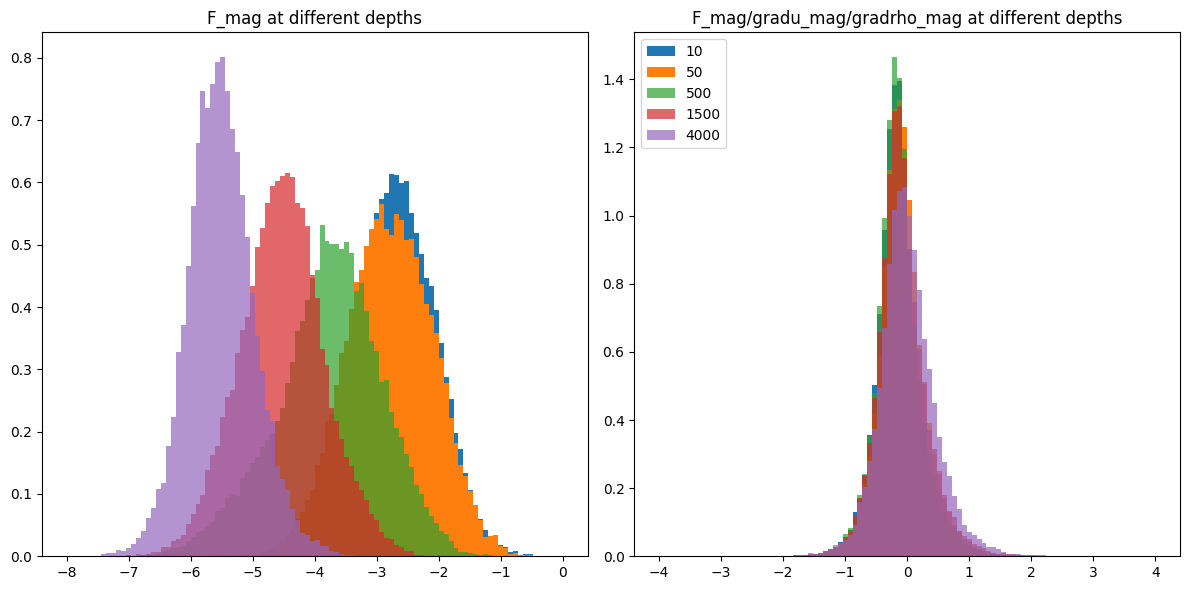

In [109]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
np.log10(F_mag).where(ds_param.wet).sel(zl=10, method='nearest').plot.hist(bins=np.linspace(-8,0,101), density=True)
np.log10(F_mag).where(ds_param.wet).sel(zl=50, method='nearest').plot.hist(bins=np.linspace(-8,0,101), density=True)
np.log10(F_mag).where(ds_param.wet).sel(zl=500, method='nearest').plot.hist(bins=np.linspace(-8,0,101), density=True, alpha=0.7)
np.log10(F_mag).where(ds_param.wet).sel(zl=1500, method='nearest').plot.hist(bins=np.linspace(-8,0,101), density=True, alpha=0.7)
np.log10(F_mag).where(ds_param.wet).sel(zl=4000, method='nearest').plot.hist(bins=np.linspace(-8,0,101), density=True, alpha=0.7)
plt.title('F_mag at different depths')

plt.subplot(1,2,2)
np.log10(F_mag/gradu_mag/gradrho_mag/dX**2).where(ds_param.wet).sel(zl=10, method='nearest').plot.hist(bins=np.linspace(-4,4,101), density=True)
np.log10(F_mag/gradu_mag/gradrho_mag/dX**2).where(ds_param.wet).sel(zl=50, method='nearest').plot.hist(bins=np.linspace(-4,4,101), density=True)
np.log10(F_mag/gradu_mag/gradrho_mag/dX**2).where(ds_param.wet).sel(zl=500, method='nearest').plot.hist(bins=np.linspace(-4,4,101), density=True, alpha=0.7)
np.log10(F_mag/gradu_mag/gradrho_mag/dX**2).where(ds_param.wet).sel(zl=1500, method='nearest').plot.hist(bins=np.linspace(-4,4,101), density=True, alpha=0.7)
np.log10(F_mag/gradu_mag/gradrho_mag/dX**2).where(ds_param.wet).sel(zl=4000, method='nearest').plot.hist(bins=np.linspace(-4,4,101), density=True, alpha=0.7)
plt.title('F_mag/gradu_mag/gradrho_mag at different depths')
plt.legend(['10','50','500','1500','4000'], loc='upper left')

plt.tight_layout()


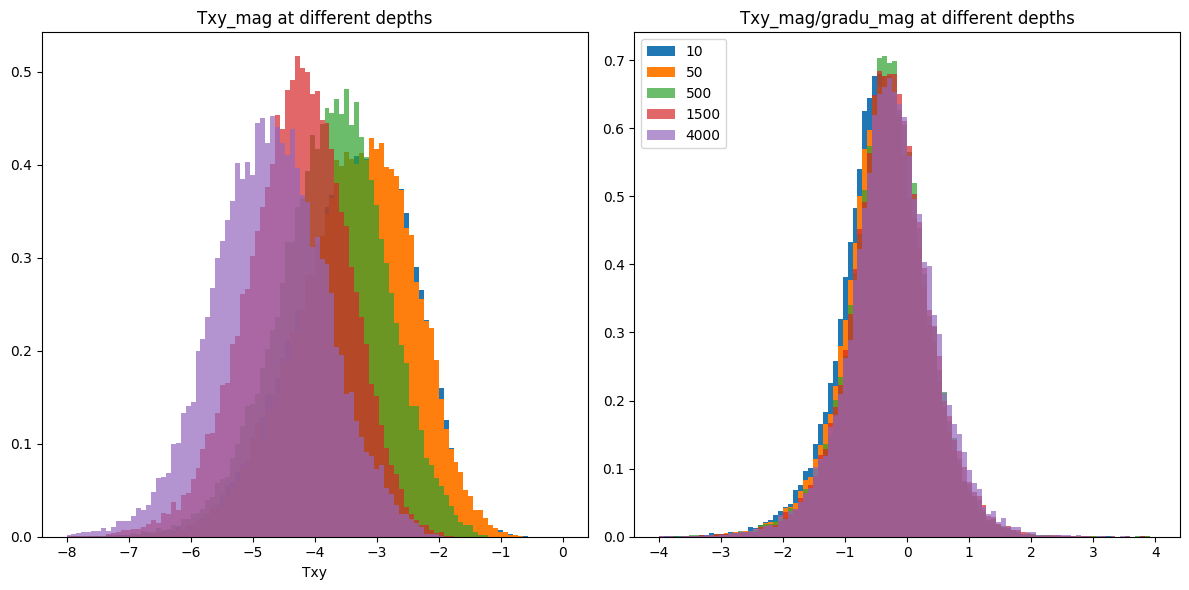

In [115]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
np.log10(Txy_mag).where(ds_param.wet).sel(zl=10, method='nearest').plot.hist(bins=np.linspace(-8,0,101), density=True)
np.log10(Txy_mag).where(ds_param.wet).sel(zl=50, method='nearest').plot.hist(bins=np.linspace(-8,0,101), density=True)
np.log10(Txy_mag).where(ds_param.wet).sel(zl=500, method='nearest').plot.hist(bins=np.linspace(-8,0,101), density=True, alpha=0.7)
np.log10(Txy_mag).where(ds_param.wet).sel(zl=1500, method='nearest').plot.hist(bins=np.linspace(-8,0,101), density=True, alpha=0.7)
np.log10(Txy_mag).where(ds_param.wet).sel(zl=4000, method='nearest').plot.hist(bins=np.linspace(-8,0,101), density=True, alpha=0.7)
plt.title('Txy_mag at different depths')

plt.subplot(1,2,2)
np.log10(Txy_mag/gradu_mag**2/dX**2).where(ds_param.wet).sel(zl=10, method='nearest').plot.hist(bins=np.linspace(-4,4,101), density=True)
np.log10(Txy_mag/gradu_mag**2/dX**2).where(ds_param.wet).sel(zl=50, method='nearest').plot.hist(bins=np.linspace(-4,4,101), density=True)
np.log10(Txy_mag/gradu_mag**2/dX**2).where(ds_param.wet).sel(zl=500, method='nearest').plot.hist(bins=np.linspace(-4,4,101), density=True, alpha=0.7)
np.log10(Txy_mag/gradu_mag**2/dX**2).where(ds_param.wet).sel(zl=1500, method='nearest').plot.hist(bins=np.linspace(-4,4,101), density=True, alpha=0.7)
np.log10(Txy_mag/gradu_mag**2/dX**2).where(ds_param.wet).sel(zl=4000, method='nearest').plot.hist(bins=np.linspace(-4,4,101), density=True, alpha=0.7)
plt.title('Txy_mag/gradu_mag at different depths')
plt.legend(['10','50','500','1500','4000'], loc='upper left')

plt.tight_layout()


In [96]:
Norm_F = F_mag/gradu_mag/gradrho_mag/dX**2

Scale_ratio = ds.deformation_radius/ds_perm.delta_x*(Norm_F/Norm_F)

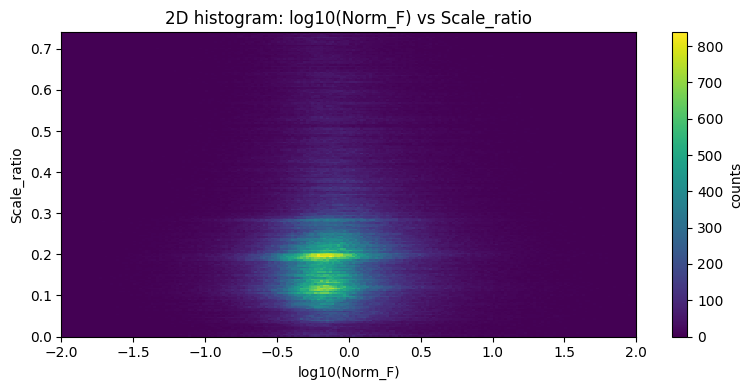

In [106]:
# 2D histogram of log10(Norm_F) vs Scale_ratio
# Align dims, compute log10 safely, flatten and mask invalid/nonpositive values
nf = Norm_F.transpose('zl', 'yh', 'xh').stack(points=('zl', 'yh', 'xh'))
sr = Scale_ratio.transpose('zl', 'yh', 'xh').stack(points=('zl', 'yh', 'xh'))

# avoid non-positive values before taking log10
nf_pos = nf.where(nf > 0)
nf_log = np.log10(nf_pos)

valid = np.isfinite(nf_log) & np.isfinite(sr)
if valid.values.sum() == 0:
    print("No valid data points for log10(Norm_F) vs Scale_ratio")
else:
    x = nf_log[valid].values
    y = sr[valid].values

    plt.figure(figsize=(8,4))
    h = plt.hist2d(x, y, bins=[np.linspace(-2, 2, 201), np.linspace(0, 0.74, 201)], cmap='viridis')
    plt.colorbar(h[3], label='counts')
    plt.xlabel('log10(Norm_F)')
    plt.ylabel('Scale_ratio')
    plt.title('2D histogram: log10(Norm_F) vs Scale_ratio')
    #plt.xlim(-4, 4)
    #plt.ylim(0, 2)
    plt.tight_layout()

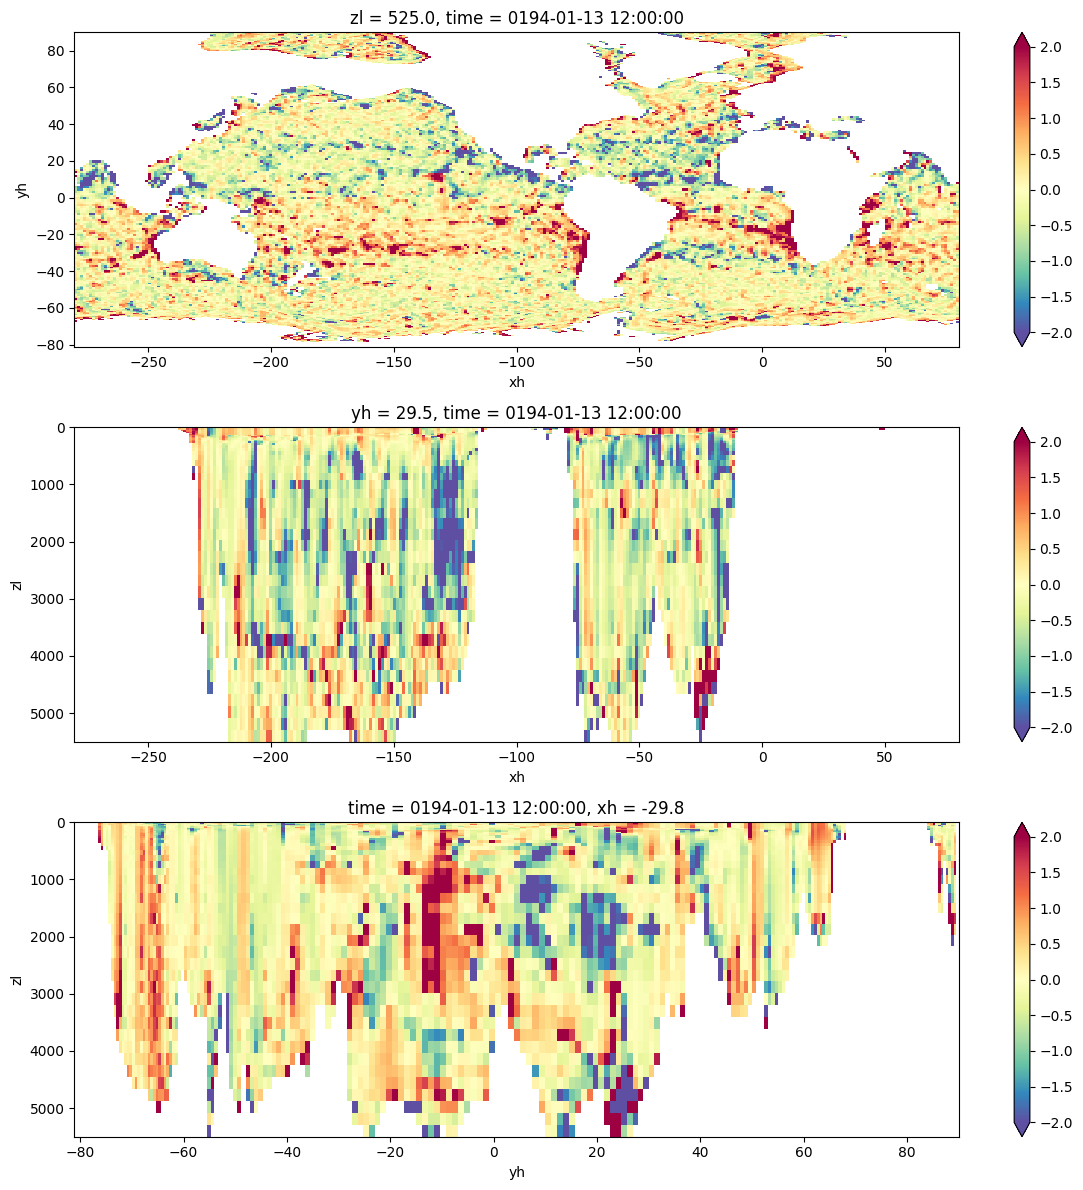

In [117]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
(ds.Fy/gradu_mag/gradrho_mag/dX**2).where(ds_param.wet).sel(zl=500, method='nearest').plot(cmap='Spectral_r', vmin=-2, robust=True)
#plt.gca().invert_yaxis()

plt.subplot(3,1,2)
(ds.Fy/gradu_mag/gradrho_mag/dX**2).where(ds_param.wet).sel(yh=30, method='nearest').plot(cmap='Spectral_r', vmin=-2, robust=True)
plt.gca().invert_yaxis()

plt.subplot(3,1,3)
(ds.Fy/gradu_mag/gradrho_mag/dX**2).where(ds_param.wet).sel(xh=-30, method='nearest').plot(cmap='Spectral_r', vmin=-2, robust=True)
plt.gca().invert_yaxis()

plt.tight_layout()

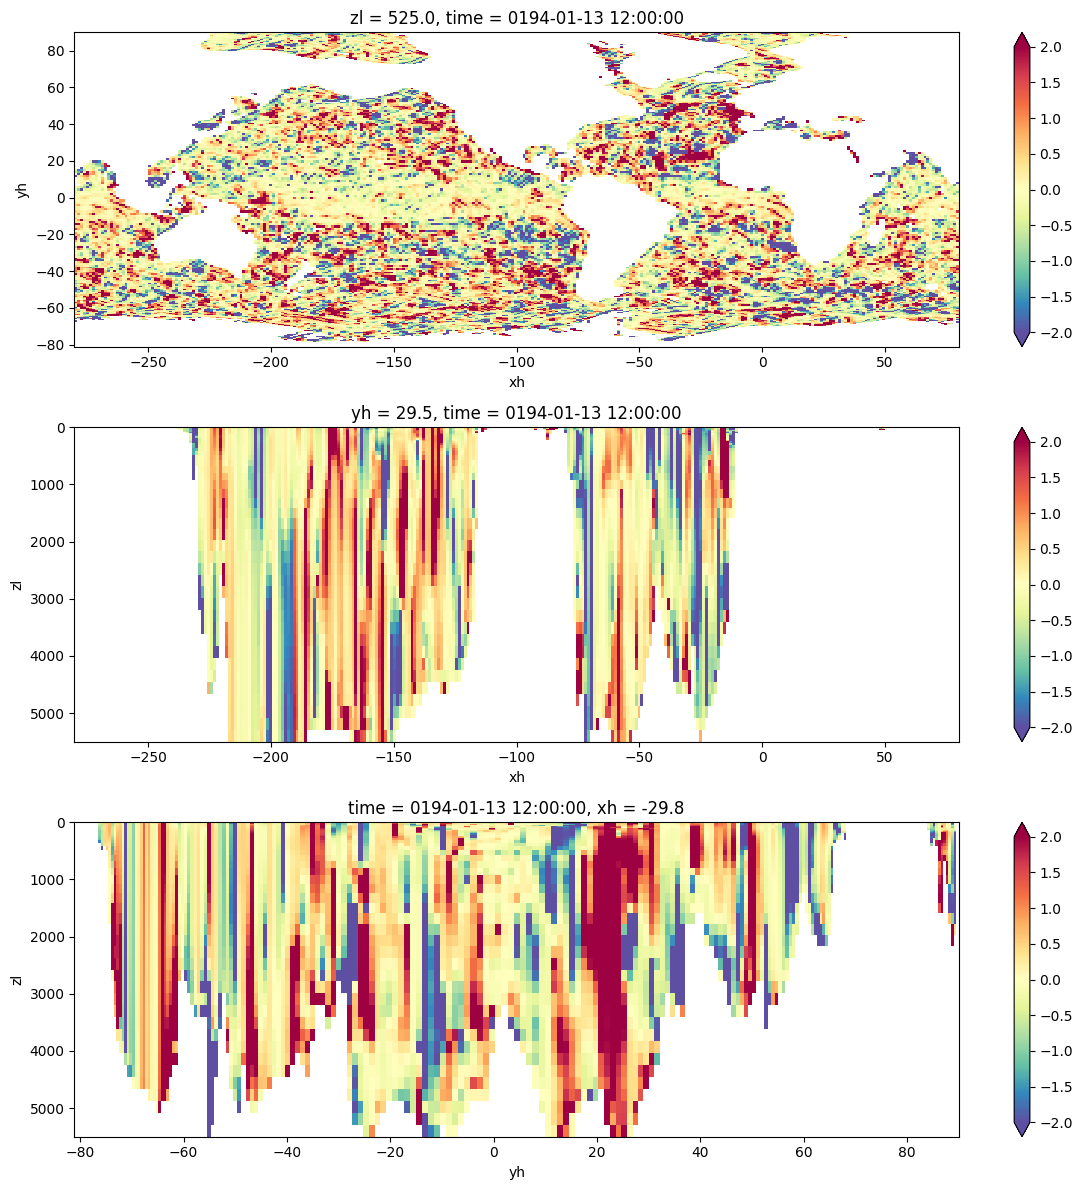

In [118]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
(ds.Txy/gradu_mag**2/dX**2).where(ds_param.wet).sel(zl=500, method='nearest').plot(cmap='Spectral_r', vmin=-2, robust=True)
#plt.gca().invert_yaxis()

plt.subplot(3,1,2)
(ds.Txy/gradu_mag**2/dX**2).where(ds_param.wet).sel(yh=30, method='nearest').plot(cmap='Spectral_r', vmin=-2, robust=True)
plt.gca().invert_yaxis()

plt.subplot(3,1,3)
(ds.Txy/gradu_mag**2/dX**2).where(ds_param.wet).sel(xh=-30, method='nearest').plot(cmap='Spectral_r', vmin=-2, robust=True)
plt.gca().invert_yaxis()

plt.tight_layout()

Under the PV forcing framework in QG (see Eden et al 2023): 

$$
S^u = \partial_x (\overline{u'u'}) +  \partial_y (\overline{v'u'}) - f \partial_z (\overline{v'b'}/N^2)
$$

$$
S^v = \partial_x (\overline{u'v'}) +  \partial_y (\overline{v'v'}) + f \partial_z (\overline{u'b'}/N^2)
$$

$\mathbf{S} = (S^u, S^v)$ is the forcing to the momentum equations. In this framework the velocity is interpreted as residual mean velocity, and no extra forcing needs to be added to the buoyancy equations on account of the PV terms (along isopycnal stirring - Solomon/Redi - still needs separate parameterization).

In [56]:

g = 9.81
rho0 = 1025
Sbu = - grid.interp(ds_perm.coriolis * grid.diff( (- ds.Fy*g/rho0 / (ds.N_buoyancy**2) ), 'Z', boundary='extend') / grid.diff(ds.zl, 'Z', boundary='extend'),
                     'Z', boundary='extend')
Sbv =   grid.interp(ds_perm.coriolis * grid.diff( (  ds.Fx*g/rho0 / (ds.N_buoyancy**2) ), 'Z', boundary='extend') / grid.diff(ds.zl, 'Z', boundary='extend'),
                     'Z', boundary='extend')

Sbu_1 = - grid.interp(ds_perm.coriolis * grid.diff( (- ds.Fy*g/rho0 ), 'Z', boundary='extend') / grid.diff(ds.zl, 'Z', boundary='extend'),
                     'Z', boundary='extend') / (ds.N_buoyancy**2)
Sbv_1 =   grid.interp(ds_perm.coriolis * grid.diff( (  ds.Fx*g/rho0 ), 'Z', boundary='extend') / grid.diff(ds.zl, 'Z', boundary='extend'),
                     'Z', boundary='extend') / (ds.N_buoyancy**2)
Sbu_2 = - grid.interp(ds_perm.coriolis * grid.diff( (1 / (ds.N_buoyancy**2) ), 'Z', boundary='extend') / grid.diff(ds.zl, 'Z', boundary='extend'),
                     'Z', boundary='extend') * (- ds.Fy*g/rho0)
Sbv_2 =   grid.interp(ds_perm.coriolis * grid.diff( (1 / (ds.N_buoyancy**2) ), 'Z', boundary='extend') / grid.diff(ds.zl, 'Z', boundary='extend'),
                     'Z', boundary='extend') * (  ds.Fx*g/rho0)

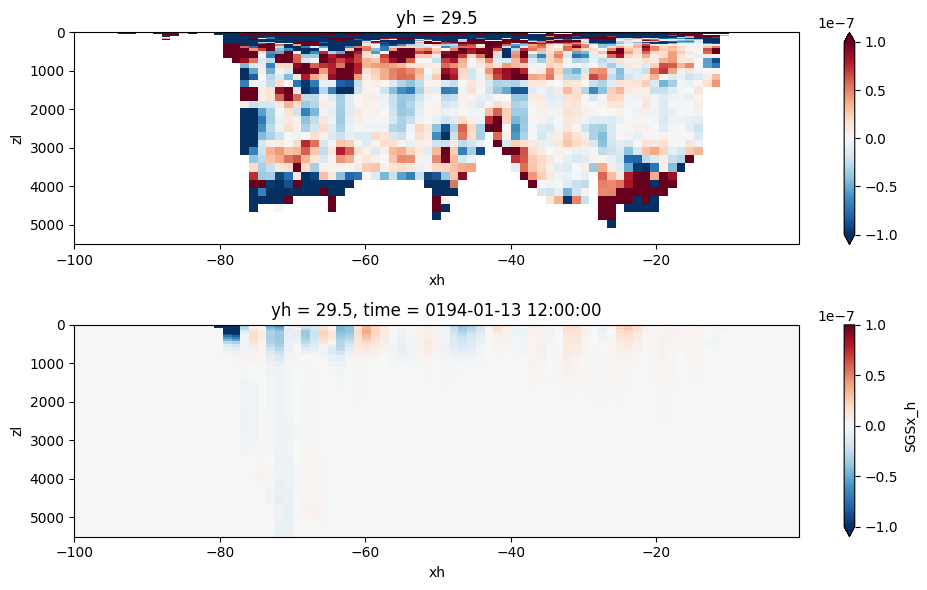

In [57]:
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
Sbu.sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', vmin=-1e-7, vmax=1e-7)
plt.gca().invert_yaxis()

plt.subplot(2,1,2)
ds.SGSx_h.sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', vmin=-1e-7, vmax=1e-7)   
plt.gca().invert_yaxis()

plt.tight_layout()

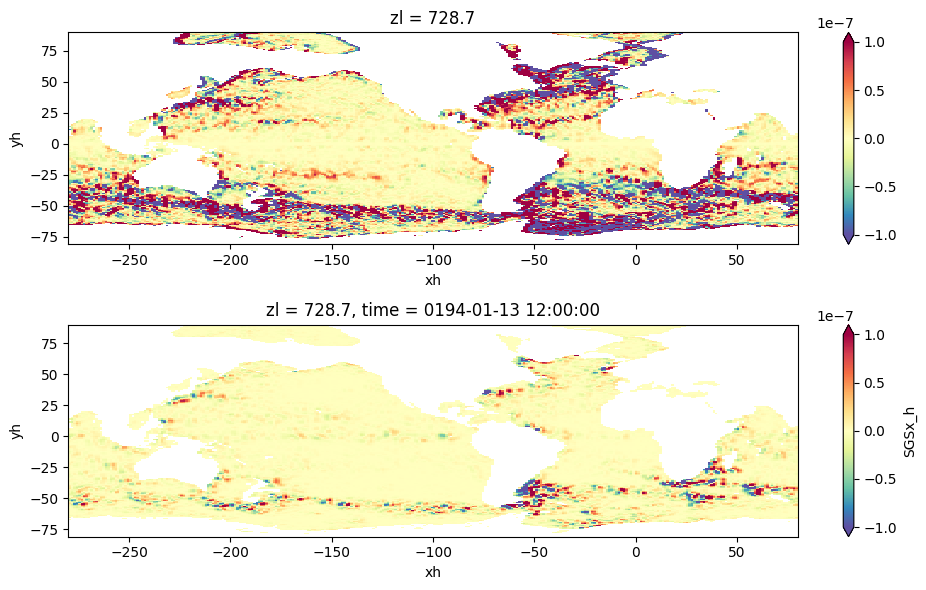

In [60]:
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
Sbu.where(ds_param.wet).sel(zl=750, method='nearest').plot(x='xh', cmap='Spectral_r', vmin=-1e-7, vmax=1e-7)

plt.subplot(2,1,2)
ds.SGSx_h.where(ds_param.wet).sel(zl=750, method='nearest').plot(x='xh', cmap='Spectral_r', vmin=-1e-7, vmax=1e-7)

plt.tight_layout()

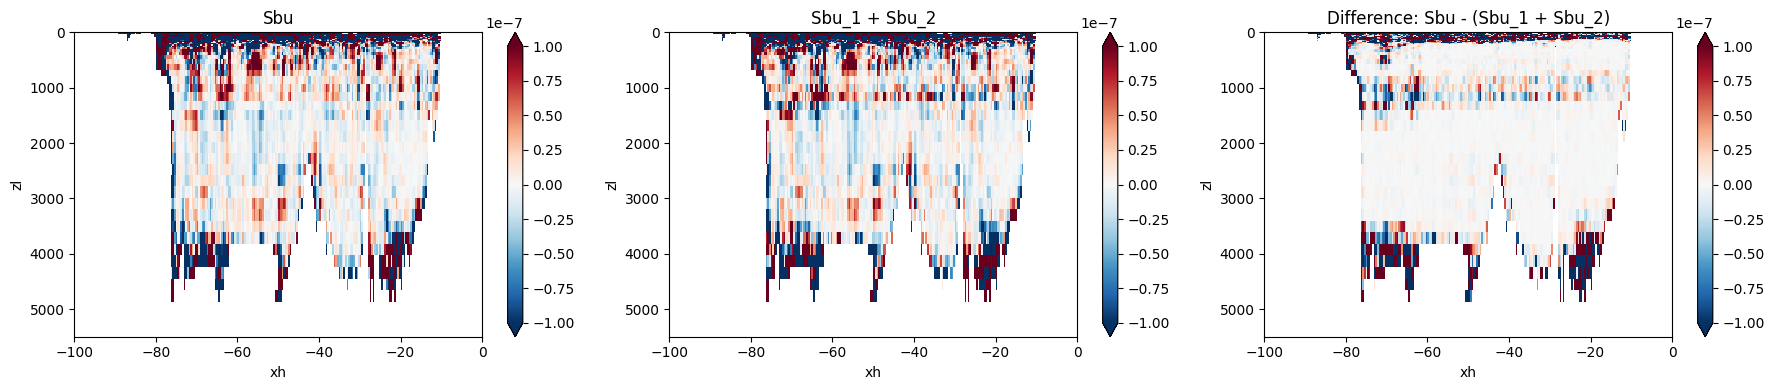

In [40]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
Sbu.sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', vmin=-1e-7, vmax=1e-7)
plt.gca().invert_yaxis()
plt.title('Sbu')

plt.subplot(1,3,2)
(Sbu_1 + Sbu_2).sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', vmin=-1e-7, vmax=1e-7)
plt.gca().invert_yaxis()
plt.title('Sbu_1 + Sbu_2')

plt.subplot(1,3,3)
(Sbu - (Sbu_1 + Sbu_2)).sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', vmin=-1e-7, vmax=1e-7)
plt.gca().invert_yaxis()
plt.title('Difference: Sbu - (Sbu_1 + Sbu_2)')

plt.tight_layout()

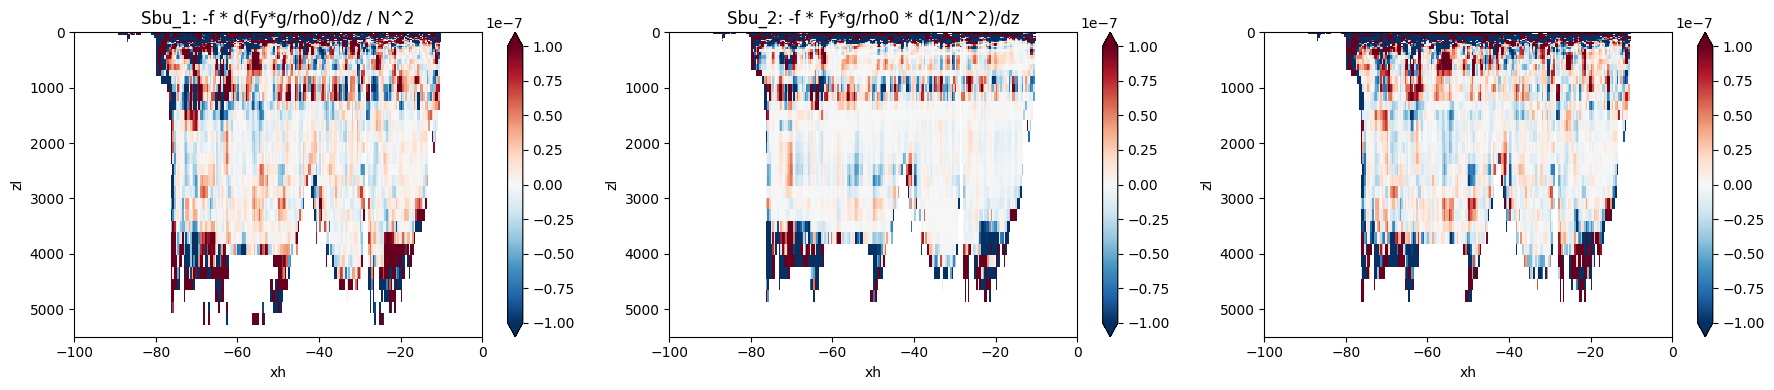

In [35]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
Sbu_1.sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', vmin=-1e-7, vmax=1e-7)
plt.gca().invert_yaxis()
plt.title('Sbu_1: -f * d(Fy*g/rho0)/dz / N^2')

plt.subplot(1,3,2)
Sbu_2.sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', vmin=-1e-7, vmax=1e-7)
plt.gca().invert_yaxis()
plt.title('Sbu_2: -f * Fy*g/rho0 * d(1/N^2)/dz')

plt.subplot(1,3,3)
Sbu.sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', vmin=-1e-7, vmax=1e-7)
plt.gca().invert_yaxis()
plt.title('Sbu: Total')

plt.tight_layout()

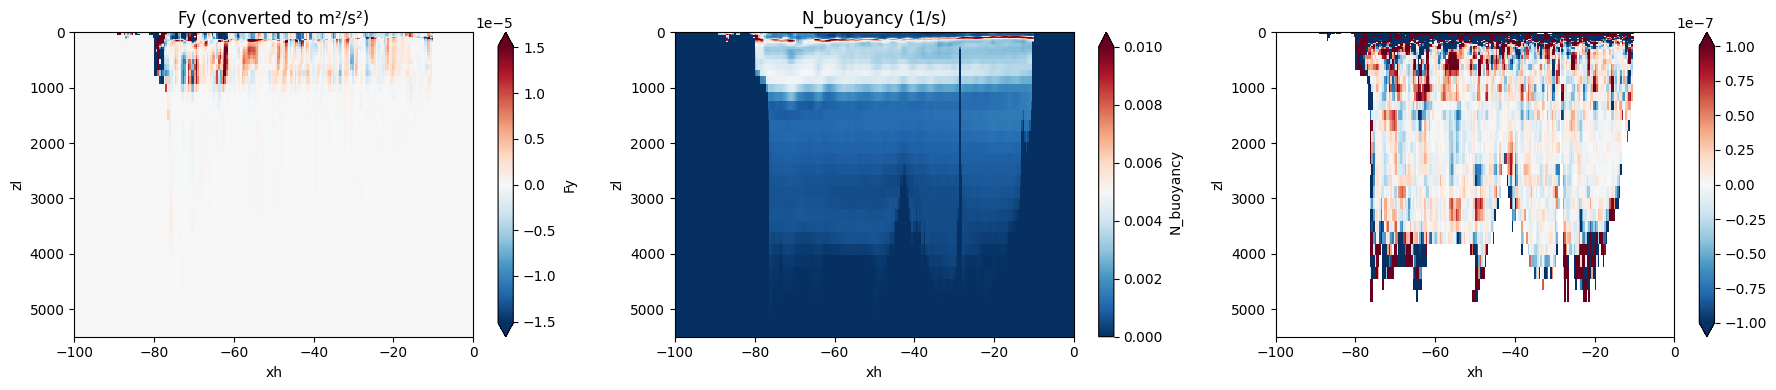

In [38]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
(-ds.Fy*g/rho0).sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', robust=True)
plt.gca().invert_yaxis()
plt.title('Fy (converted to m²/s²)')

plt.subplot(1,3,2)
ds.N_buoyancy.sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', vmin=0, vmax=0.01 )
plt.gca().invert_yaxis()
plt.title('N_buoyancy (1/s)')

plt.subplot(1,3,3)
Sbu.sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', vmin=-1e-7, vmax=1e-7)
plt.gca().invert_yaxis()
plt.title('Sbu (m/s²)')

plt.tight_layout()

Text(0.5, 1.0, 'Fy (converted to m²/s²)')

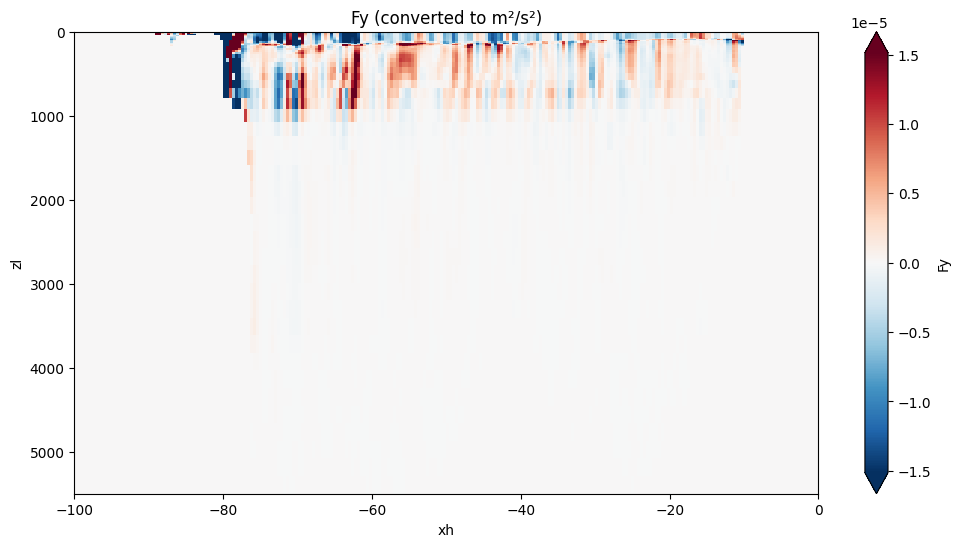

In [60]:
plt.figure(figsize=(12,6))
(-ds.Fy*g/rho0).sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', robust=True)
plt.gca().invert_yaxis()
plt.title('Fy (converted to m²/s²)')

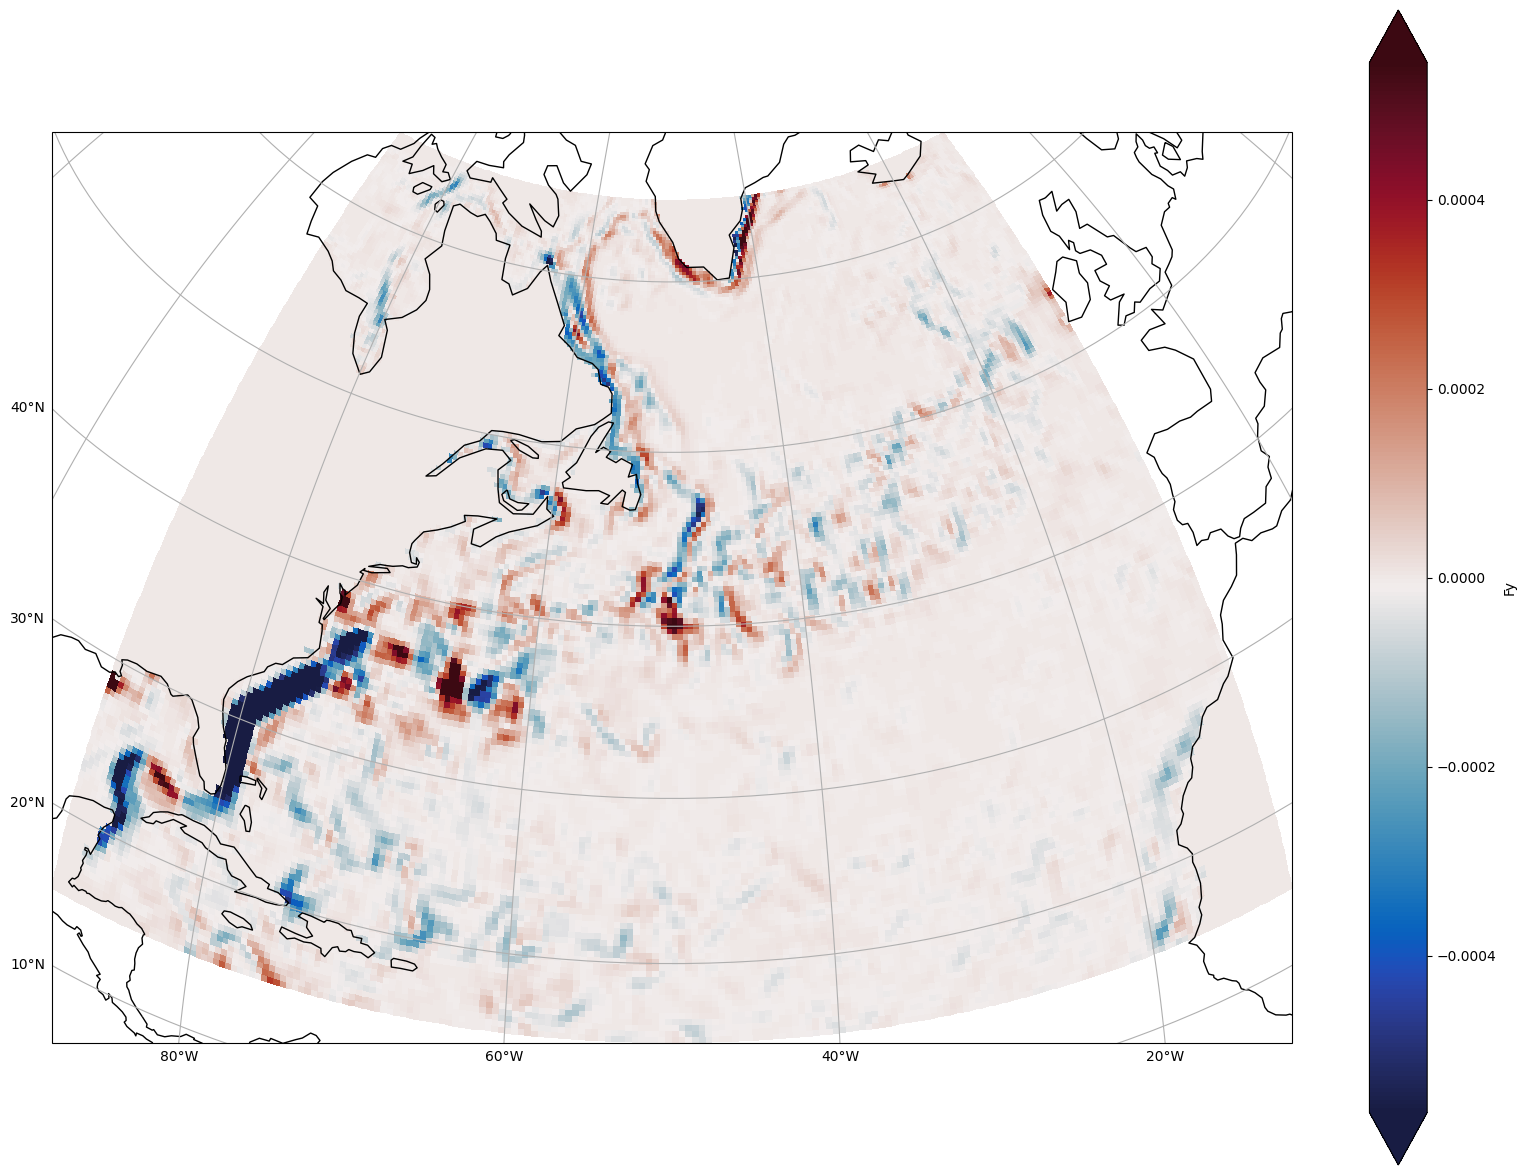

In [42]:
plot(-ds.Fy.isel(zl=0)*g/rho0)

In [66]:
compare(ds.rhox.isel(zl=10), .isel(zl=20)*g/rho0, selector=select_Pacific)

SyntaxError: invalid syntax (2824565486.py, line 1)

Correlation: -0.011584081795116928
Relative Error: 1.0157274784934252
R2 =  -0.003429118439336243
R2 max =  9.122962557961412e-05
Optinal scaling: -0.3820337470903628
Nans [test/control]: [0, 20975]


array([[<Axes: title={'center': 'Tested field'}, xlabel='xh', ylabel='yh'>,
        <Axes: title={'center': 'Control field'}, xlabel='xh', ylabel='yh'>],
       [<Axes: title={'center': 'Tested field $-$ Control field'}, xlabel='xh', ylabel='yh'>,
        <Axes: >]], dtype=object)

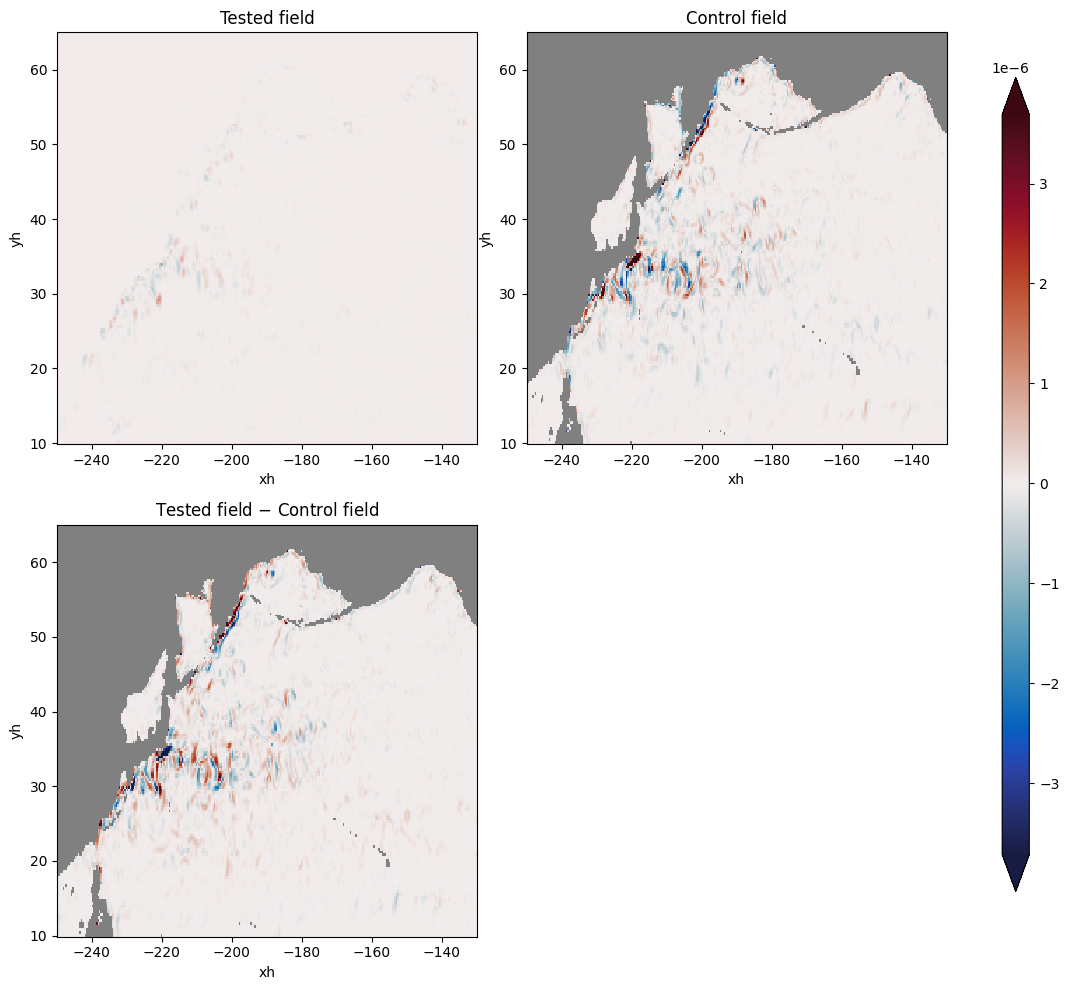

In [65]:
sel_zl = 20
compare(ds.SGSx_h.isel(zl=sel_zl), Sbu.isel(zl=sel_zl), selector=select_Pacific)

In [ ]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
(-ds.Fy*g/rho0).sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', robust=True)
plt.gca().invert_yaxis()
plt.title('Fy (converted to m²/s²)')

plt.subplot(1,3,2)
ds.N_buoyancy.sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', vmin=0, vmax=0.01 )
plt.gca().invert_yaxis()
plt.title('N_buoyancy (1/s)')

plt.subplot(1,3,3)
Sbu.sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', vmin=-1e-7, vmax=1e-7)
plt.gca().invert_yaxis()
plt.title('Sbu (m/s²)')

plt.tight_layout()

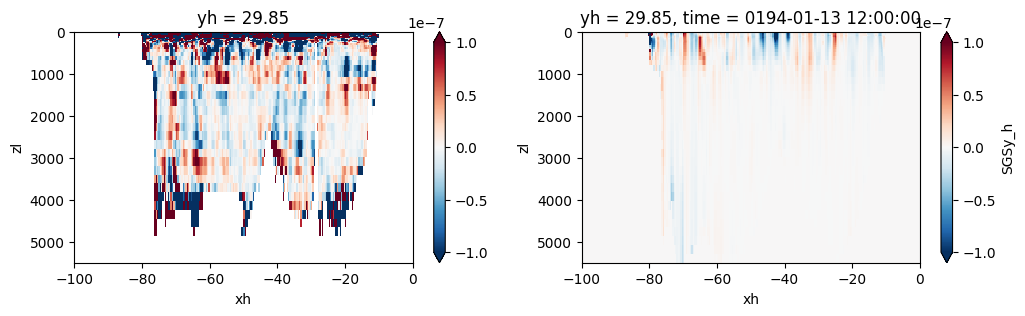

In [32]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
Sbv.sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', vmin=-1e-7)
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
ds.SGSy_h.sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', vmin=-1e-7)
plt.gca().invert_yaxis()

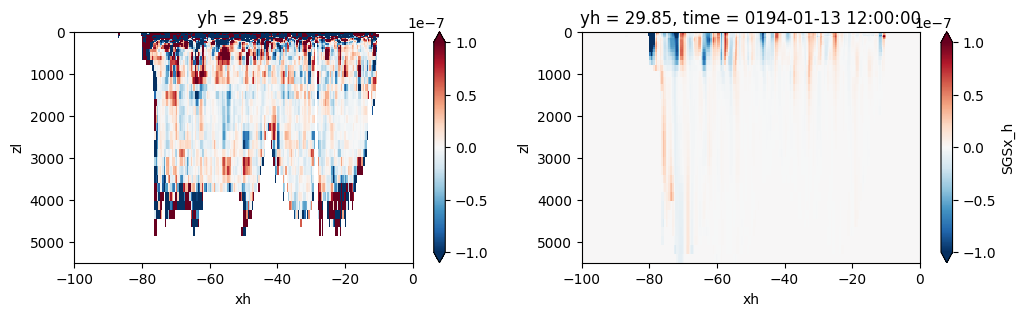

In [31]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
Sbu.sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', vmin=-1e-7)
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
ds.SGSx_h.sel(yh=30, method='nearest').sel(xh=slice(-100,0)).plot(x='xh', cmap='RdBu_r', vmin=-1e-7)
plt.gca().invert_yaxis()